<a href="https://colab.research.google.com/github/RanaHassan-harsan/Zeham-Management-Technologies-Bootcamp/blob/main/Week6/Day1/Image_Classification_using_Machine_Learning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [6]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression

x_train_flat = train_images.reshape(train_images.shape[0], -1)
x_test_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize images for Softmax Regression

x_train_norm = train_images / 255.0
x_test_norm = test_images / 255.0


## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [21]:
logisticReg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)

In [22]:
logisticReg_model.fit(x_train_flat, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [23]:
pred_logistic = logisticReg_model.predict(x_test_flat)

In [24]:
accuracy_score(test_labels, pred_logistic)

0.8439

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [25]:
softmaxReg_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
softmaxReg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
softmaxReg_model.fit(x_train_norm, train_labels, epochs=10, validation_data=(x_test_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5392 - loss: 2.1778 - val_accuracy: 0.6630 - val_loss: 1.8566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6751 - loss: 1.7701 - val_accuracy: 0.6875 - val_loss: 1.5504
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6936 - loss: 1.4862 - val_accuracy: 0.7008 - val_loss: 1.3385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7066 - loss: 1.2902 - val_accuracy: 0.7066 - val_loss: 1.1890
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7129 - loss: 1.1555 - val_accuracy: 0.7147 - val_loss: 1.0811
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7217 - loss: 1.0536 - val_accuracy: 0.7227 - val_loss: 1.0016
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7295 - loss: 0.9810 - val_accuracy: 0.7277 - val_loss: 0.9415
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7320 - loss: 0.9266 - 

In [32]:
softmaxReg_model.evaluate(x_test_norm, test_labels, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.7423 - loss: 0.8279


[0.8278921842575073, 0.7422999739646912]

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

In [33]:
pred = softmaxReg_model.predict(x_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


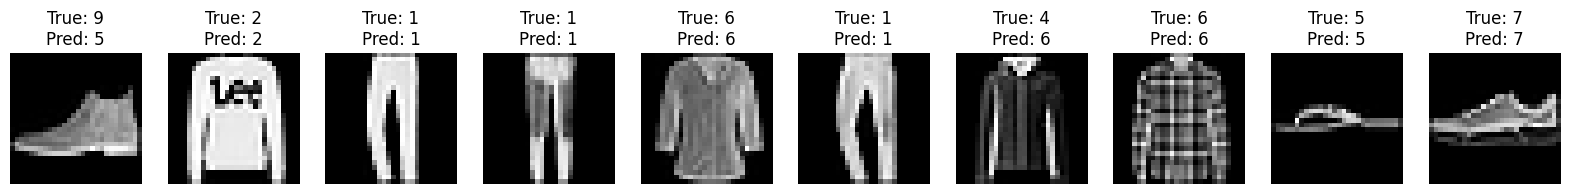

In [35]:
plot_images(test_images, test_labels, pred)

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.